In [19]:
# autoreload .py files
%load_ext autoreload
%autoreload 2  
import utility

from utility import load_dataset,tfidf_preprocessing,keras_text_preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import TextVectorization

DATASET = 3 # so functiona com train test val, o resto não têm val
batch_size = 256*2
SAVE_DIR = "models_dnn/"


MAX_TOKENS = 5000 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
train, test, val = load_dataset(DATASET)

RESULTS = {}

def tabular_pipeline(model_name,text_vectorization,max_len,
                     # train, test, val,
                     hidden_dims=[64,32,16],dropout = 0.2  ):
    
    tf_train,tf_test,tf_val = keras_text_preprocessing(train,test,val,text_vectorization,batch_size)    
    model = utility.get_dnn_model(max_tokens= max_len, hidden_dims = hidden_dims,dropout = dropout)
    model.summary()
    history,metrics_train = utility.train_model(model,model_name,tf_train,tf_val)

    utility.plot_losses(history)
    
    metrics_test = utility.test_model(model,tf_test)


    # Create inference model
    inputs = keras.Input(shape=(1,), dtype="string")
    processed_inputs = text_vectorization(inputs)
    outputs = model(processed_inputs)
    inference_model = keras.Model(inputs, outputs)

    inference_model.save(f'{SAVE_DIR}dnn_dataset{DATASET}.keras')

    # inference
    df_input = pd.read_csv('../../datasets/val/dataset1_inputs.csv', sep='\t')
    df_output = pd.read_csv('../../datasets/val/dataset1_outputs.csv', sep='\t')
    utility.test_inference(inference_model,df_input['Text'],df_output['Label'])

    return metrics_train | metrics_test 


## Bag of words

#### Single words (unigrams) with binary encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('and'), np.str_('a'), np.str_('in'), np.str_('to'), np.str_('we'), np.str_('that'), np.str_('for'), np.str_('is'), np.str_('with'), np.str_('this'), np.str_('our'), np.str_('on'), np.str_('are'), np.str_('by'), np.str_('as'), np.str_('which'), np.str_('from'), np.str_('be'), np.str_('an'), np.str_('can'), np.str_('these'), np.str_('at'), np.str_('results'), np.str_('study'), np.str_('have'), np.str_('paper'), np.str_('data'), np.str_('their'), np.str_('it'), np.str_('model'), np.str_('also'), np.str_('properties'), np.str_('such'), np.str_('between'), np.str_('show'), np.str_('using'), np.str_('has'), np.str_('new'), np.str_('its'), np.str_('analysis'), np.str_('into'), np.str_('systems'), np.str_('approach'), np.str_('system'), np.str_('galaxies'), np.str_('models'), np.str_('field'), np.str_('method'), np.str_('or'), np.str_('provide'), np.str_('two'), np.str_('formation'), np.str_('understanding'), np.str_('present'), np.str_('find'),

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5915 - loss: 0.6712 - val_accuracy: 0.8703 - val_loss: 0.5703
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7903 - loss: 0.5649 - val_accuracy: 0.9393 - val_loss: 0.4359
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8704 - loss: 0.4500 - val_accuracy: 0.9553 - val_loss: 0.3247
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9086 - loss: 0.3568 - val_accuracy: 0.9633 - val_loss: 0.2444
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9254 - loss: 0.2916 - val_accuracy: 0.9677 - val_loss: 0.1895
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9370 - loss: 0.2393 - val_accuracy: 0.9703 - val_loss: 0.1515
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.2011 - val_accuracy: 0.9703 - val_loss: 0.1259
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9550 - loss: 0.1724 - val_accuracy: 0

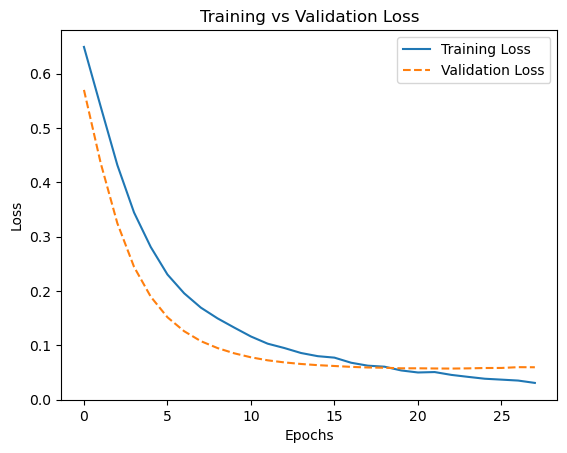

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9828 - loss: 0.0507 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1500
           1       0.98      0.98      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[1475   25]
 [  35 1465]]
              precision    recall  f1-score   support

          AI       0.75      0.20      0.32        15
       Human       0.54      0.93      0.68        15

    accuracy                           0.57        30
   macro avg       0.64      0.57      0.50        30
weighted avg       0.64      0.57      0.50        30

[[ 3 12]
 [ 1 14]]


In [21]:
NAME = "unigram_be.keras"

text_vectorization_singlegram_be = TextVectorization(
    max_tokens= MAX_TOKENS,
    output_mode="multi_hot",
    standardize = "lower_and_strip_punctuation",
)

RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_singlegram_be,MAX_TOKENS)

#### Bigrams with binary encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('and'), np.str_('a'), np.str_('in'), np.str_('to'), np.str_('we'), np.str_('of the'), np.str_('that'), np.str_('for'), np.str_('is'), np.str_('with'), np.str_('this'), np.str_('our'), np.str_('on'), np.str_('in the'), np.str_('are'), np.str_('by'), np.str_('as'), np.str_('which'), np.str_('from'), np.str_('be'), np.str_('an'), np.str_('can'), np.str_('these'), np.str_('at'), np.str_('results'), np.str_('that the'), np.str_('on the'), np.str_('study'), np.str_('to the'), np.str_('and the'), np.str_('have'), np.str_('for the'), np.str_('paper'), np.str_('data'), np.str_('their'), np.str_('in this'), np.str_('it'), np.str_('model'), np.str_('also'), np.str_('properties'), np.str_('such'), np.str_('between'), np.str_('show'), np.str_('using'), np.str_('has'), np.str_('this paper'), np.str_('new'), np.str_('its'), np.str_('of a'), np.str_('analysis'), np.str_('into'), np.str_('systems'), np.str_('approach'), np.str_('with the'), np.str_('show

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5705 - loss: 0.6701 - val_accuracy: 0.7623 - val_loss: 0.5869
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7313 - loss: 0.5788 - val_accuracy: 0.9167 - val_loss: 0.4661
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8482 - loss: 0.4756 - val_accuracy: 0.9523 - val_loss: 0.3564
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9008 - loss: 0.3839 - val_accuracy: 0.9663 - val_loss: 0.2690
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9198 - loss: 0.3125 - val_accuracy: 0.9703 - val_loss: 0.2055
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9349 - loss: 0.2596 - val_accuracy: 0.9733 - val_loss: 0.1622
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9439 - loss: 0.2186 - val_accuracy: 0.9750 - val_loss: 0.1309
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9541 - loss: 0.1848 - val_accuracy: 

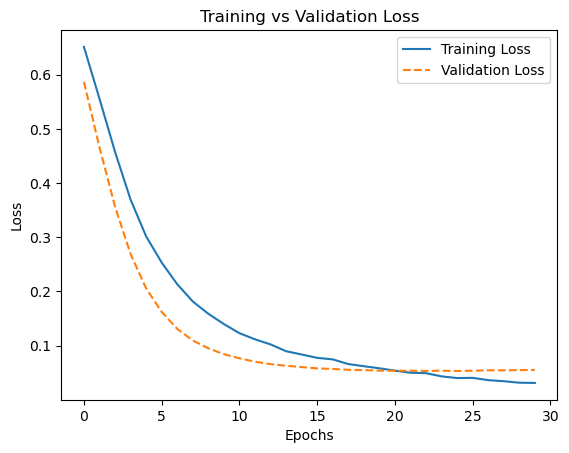

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9842 - loss: 0.0424 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1500
           1       0.98      0.98      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[1477   23]
 [  28 1472]]
              precision    recall  f1-score   support

          AI       1.00      0.13      0.24        15
       Human       0.54      1.00      0.70        15

    accuracy                           0.57        30
   macro avg       0.77      0.57      0.47        30
weighted avg       0.77      0.57      0.47        30

[[ 2 13]
 [ 0 15]]


In [22]:
NAME = "bigram_be.keras"

text_vectorization_bigram_be = TextVectorization(
    ngrams=2,
    max_tokens=MAX_TOKENS,
    output_mode="multi_hot",
)
RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_bigram_be,MAX_TOKENS)

#### Bigrams with TF-IDF encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('and'), np.str_('a'), np.str_('in'), np.str_('to'), np.str_('we'), np.str_('of the'), np.str_('that'), np.str_('for'), np.str_('is'), np.str_('with'), np.str_('this'), np.str_('our'), np.str_('on'), np.str_('in the'), np.str_('are'), np.str_('by'), np.str_('as'), np.str_('which'), np.str_('from'), np.str_('be'), np.str_('an'), np.str_('can'), np.str_('these'), np.str_('at'), np.str_('results'), np.str_('that the'), np.str_('on the'), np.str_('study'), np.str_('to the'), np.str_('and the'), np.str_('have'), np.str_('for the'), np.str_('paper'), np.str_('data'), np.str_('their'), np.str_('in this'), np.str_('it'), np.str_('model'), np.str_('also'), np.str_('properties'), np.str_('such'), np.str_('between'), np.str_('show'), np.str_('using'), np.str_('has'), np.str_('this paper'), np.str_('new'), np.str_('its'), np.str_('of a'), np.str_('analysis'), np.str_('into'), np.str_('systems'), np.str_('approach'), np.str_('with the'), np.str_('show

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.4964 - loss: 4.5536 - val_accuracy: 0.5000 - val_loss: 1.4601
Epoch 2/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5112 - loss: 3.1713 - val_accuracy: 0.5023 - val_loss: 0.9571
Epoch 3/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5246 - loss: 2.3533 - val_accuracy: 0.4800 - val_loss: 0.7157
Epoch 4/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5144 - loss: 1.8692 - val_accuracy: 0.4930 - val_loss: 0.8586
Epoch 5/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5238 - loss: 1.5287 - val_accuracy: 0.4997 - val_loss: 0.8355
Epoch 6/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5303 - loss: 1.2868 - val_accuracy: 0.5027 - val_loss: 0.7579
Epoch 7/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5340 - loss: 1.1210 - val_accuracy: 0.5060 - val_loss: 0.7302
Epoch 8/5000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5348 - loss: 1.0231 - val_accuracy: 

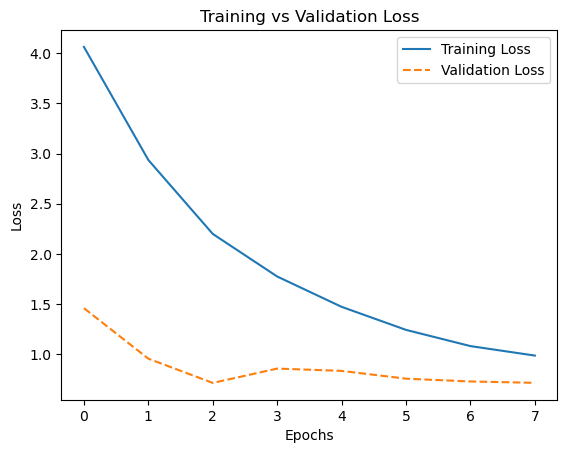

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4932 - loss: 0.7184 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

           0       0.49      0.60      0.54      1500
           1       0.49      0.38      0.43      1500

    accuracy                           0.49      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.49      0.49      0.49      3000

[[904 596]
 [927 573]]
              precision    recall  f1-score   support

          AI       0.50      0.13      0.21        15
       Human       0.50      0.87      0.63        15

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.42        30
weighted avg       0.50      0.50      0.42        30

[[ 2 13]
 [ 2 13]]


In [23]:
MAX_TOKENS = 1000 

NAME = "bigram_tf_idf.keras"
text_vectorization_bigram_tf_idf = TextVectorization(
    ngrams=2,
    max_tokens=MAX_TOKENS,
    output_mode="tf_idf",
)
RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_bigram_tf_idf,MAX_TOKENS)

# Final results

In [24]:
from pprint import pprint
pprint(RESULTS)

{'bigram_be.keras': {'test_accuracy': 0.9829999804496765,
                     'test_loss': 0.04842812195420265,
                     'train_accuracy': 0.9907857179641724,
                     'train_loss': 0.03105764463543892,
                     'val_accuracy': 0.9826666712760925,
                     'val_loss': 0.05491269752383232},
 'bigram_tf_idf.keras': {'test_accuracy': 0.492333322763443,
                         'test_loss': 0.7183780670166016,
                         'train_accuracy': 0.5362856984138489,
                         'train_loss': 0.9879583120346069,
                         'val_accuracy': 0.515333354473114,
                         'val_loss': 0.7165139317512512},
 'unigram_be.keras': {'test_accuracy': 0.9800000190734863,
                      'test_loss': 0.056925032287836075,
                      'train_accuracy': 0.9917142987251282,
                      'train_loss': 0.030661849305033684,
                      'val_accuracy': 0.9776666760444641,
         

# Conclusões

As 3 abordagens têm resultados muito semelhantes.

Apesar de terem bons resultados nos dados de teste. No dataset de inference os resultados não se mantêm e têm uma performance fraca.

Fez se algum tunning nos hyperametros da DNN até perfazer um equilibrio aceitável entre erro de validaçºao e treino, para assegurar que o modelo não dê overfit nem underfit.

Explorou-se também o tamanho do vocabulário das 3 estratégias com o argumento MAX_TOKENS. Dos valores experimentados {500,1000,5000,10000,20000} 5000 têve os melhores resultados no dataset de inference. Para {10000,20000}  os modelos facilmente davam overefit e classificavam tudo com a mesma classe. Para {500,1000} deu piores resultados que {5000}, parece ser um vocabulário demasiado curto para representar o problema, levando a demasiada perda de informação e portanto, underfit.
